# Clustering Plot for Course Popularity and Success Rate

This scatter plot visualizes clusters of courses grouped by popularity and performance.
Each point represents a course, positioned based on two principal components derived
from ratings, average grades, and enrollment. Courses in Cluster 1, for example, tend
to have both high popularity and good performance, making them attractive options for students.
Clusters help identify course characteristics and patterns based on the selected metrics.


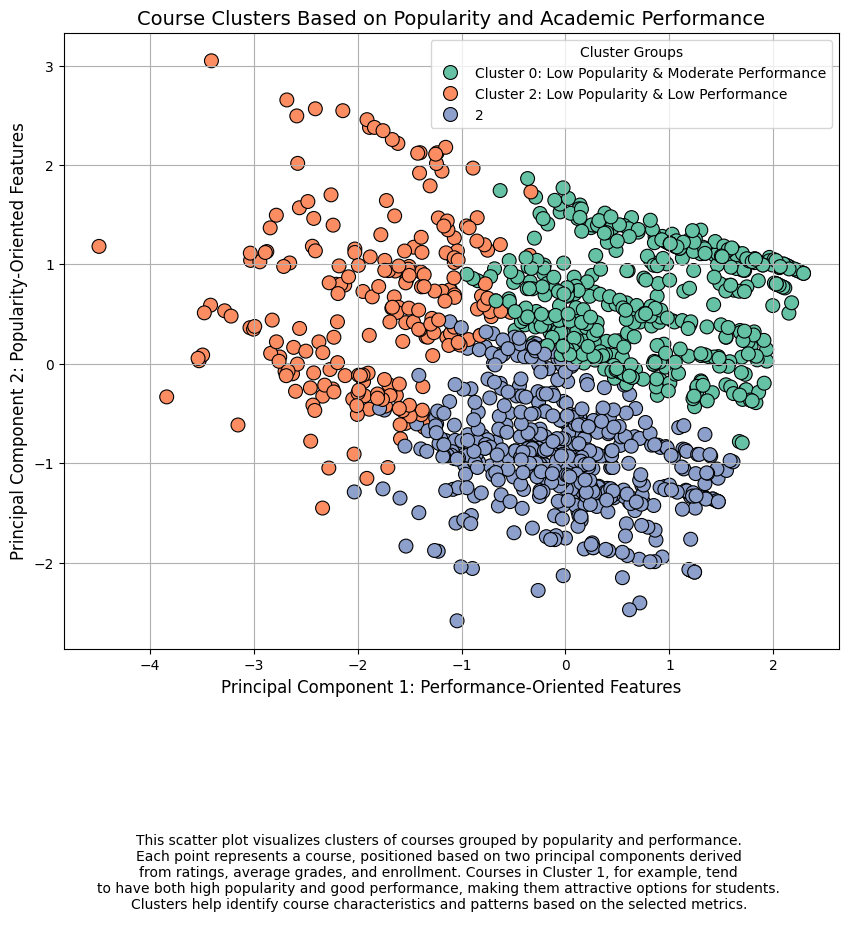

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
gd_cs_14_24 = pd.read_excel('CS418_Team5_DataSet.xlsx', sheet_name='GD_CS_14_24')
rmp_cs_14_24 = pd.read_excel('CS418_Team5_DataSet.xlsx', sheet_name='RMP_CS_14_24')
cs_descrip = pd.read_excel('CS418_Team5_DataSet.xlsx', sheet_name='CS_Descrip')

# Calculate average grade for each course in gd_cs_14_24
gd_cs_14_24['Total Grades'] = gd_cs_14_24[['A', 'B', 'C', 'D', 'F']].sum(axis=1)
gd_cs_14_24['Average Grade'] = (
    gd_cs_14_24['A'] * 4 + gd_cs_14_24['B'] * 3 + gd_cs_14_24['C'] * 2 + gd_cs_14_24['D'] * 1
) / gd_cs_14_24['Total Grades']

# Merge gd_cs_14_24 with rmp_cs_14_24 on 'Primary Instructor' and 'Instructor'
data = pd.merge(
    gd_cs_14_24,
    rmp_cs_14_24,
    left_on='Primary Instructor',
    right_on='Instructor',
    how='left'
)

# Convert 'CRS NBR' in both dataframes to strings to enable merging
data['CRS NBR'] = data['CRS NBR'].astype(str)
cs_descrip['Course'] = cs_descrip['Course'].astype(str)

# Merge with cs_descrip on 'CRS SUBJ CD' and 'CRS NBR'
data = pd.merge(
    data,
    cs_descrip,
    left_on=['CRS SUBJ CD', 'CRS NBR'],
    right_on=['Course', 'Course Title'],
    how='left'
)

# Replace missing RMP ratings with the default value of 5
data['Rating'] = data['Rating'].fillna(5)

# Ensure there are no NaNs in selected features by filling remaining missing values with column means
features = data[['Average Grade', 'Rating', 'Grade Regs']].fillna(data[['Average Grade', 'Rating', 'Grade Regs']].mean())

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans and PCA
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(features_scaled)
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

# Add clusters to the dataset for labeling
data['Cluster'] = clusters

import matplotlib.pyplot as plt
import seaborn as sns

# Plot clusters with additional information
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x=features_2d[:, 0],
    y=features_2d[:, 1],
    hue=clusters,
    palette="Set2",
    s=100,
    edgecolor="black"
)

# Title and axis labels
plt.title("Course Clusters Based on Popularity and Academic Performance", fontsize=14)
plt.xlabel("Principal Component 1: Performance-Oriented Features", fontsize=12)
plt.ylabel("Principal Component 2: Popularity-Oriented Features", fontsize=12)

caption = """
This scatter plot visualizes clusters of courses grouped by popularity and performance.
Each point represents a course, positioned based on two principal components derived
from ratings, average grades, and enrollment. Courses in Cluster 1, for example, tend
to have both high popularity and good performance, making them attractive options for students.
Clusters help identify course characteristics and patterns based on the selected metrics.
"""

# Add legend with clearer descriptions
legend = plt.legend(title="Cluster Groups")
legend.texts[0].set_text("Cluster 0: Low Popularity & Moderate Performance")  # Example; adjust based on clusters
legend.texts[1].set_text("Cluster 1: High Popularity & High Performance")
legend.texts[1].set_text("Cluster 2: Low Popularity & Low Performance")

plt.figtext(0.5, -0.1, caption, ha="center", va="top", fontsize=10, wrap=True)

# Display the plot
plt.grid(True)
plt.show()



# Grade Distribution by Course Level

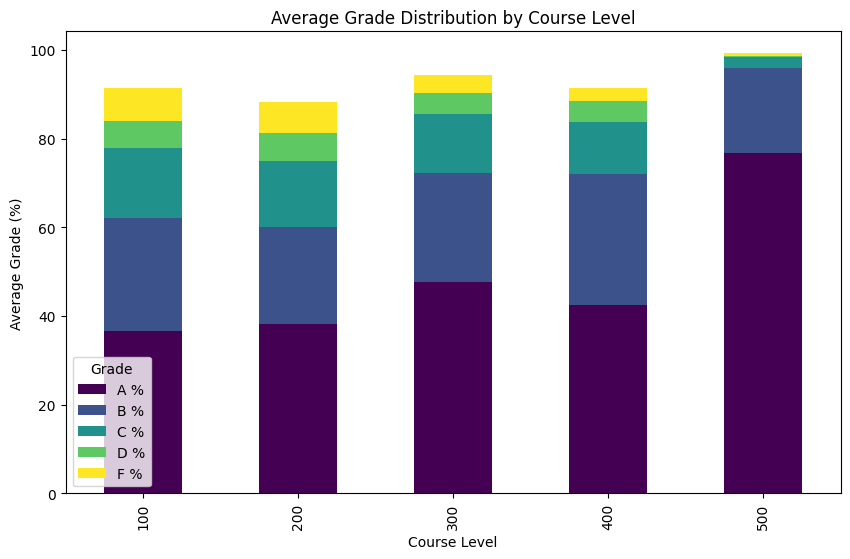

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
data = pd.read_excel('CS418_Team5_DataSet.xlsx', sheet_name='GD_CS_14_24')
# Add a new column to categorize course numbers into levels (e.g., 100, 200, 300, etc.)
data['Course Level'] = (data['CRS NBR'] // 100) * 100

# Calculate total number of registered students per course
data['Total Registered'] = data[['A', 'B', 'C', 'D', 'F', 'W']].sum(axis=1)

# Calculate the grade distribution as a percentage of the total registered students
for grade in ['A', 'B', 'C', 'D', 'F']:
    data[f'{grade} %'] = (data[grade] / data['Total Registered']) * 100

# Aggregate average grade distribution by course level
grade_distribution = data.groupby('Course Level')[[f'{grade} %' for grade in ['A', 'B', 'C', 'D', 'F']]].mean()

# Plot grade distribution by course level
grade_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Average Grade Distribution by Course Level")
plt.xlabel("Course Level")
plt.ylabel("Average Grade (%)")
plt.legend(title="Grade")
plt.show()


# Grade distributions by year and semester

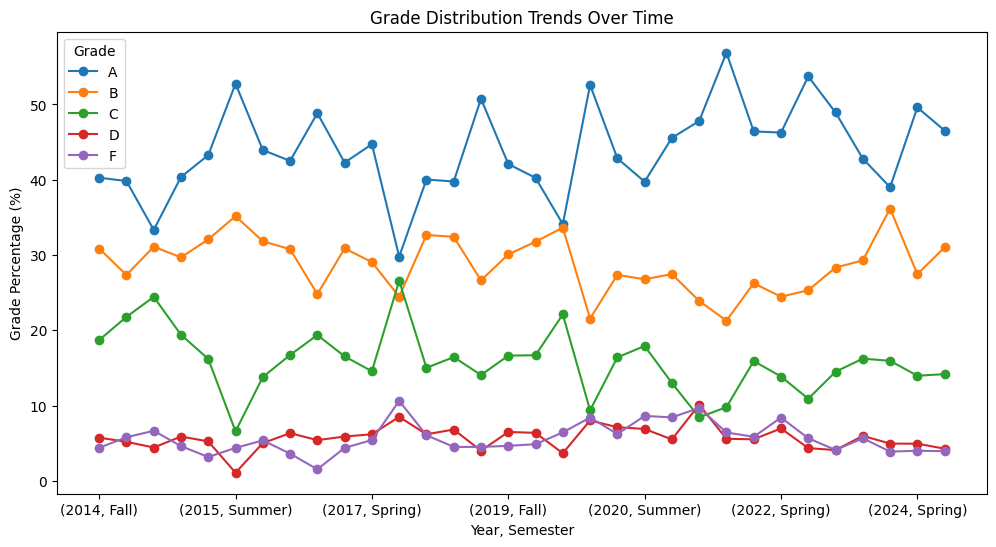

In [3]:
# Aggregate grade distributions by year and semester
grade_trends = data.groupby(['YEAR', 'SEMESTER'])[['A', 'B', 'C', 'D', 'F']].sum()

# Calculate percentages for each grade
grade_trends_percent = grade_trends.div(grade_trends.sum(axis=1), axis=0) * 100

# Plotting
grade_trends_percent.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Grade Distribution Trends Over Time")
plt.xlabel("Year, Semester")
plt.ylabel("Grade Percentage (%)")
plt.legend(title="Grade")
plt.show()


# Enrollment Trends Over Semesters

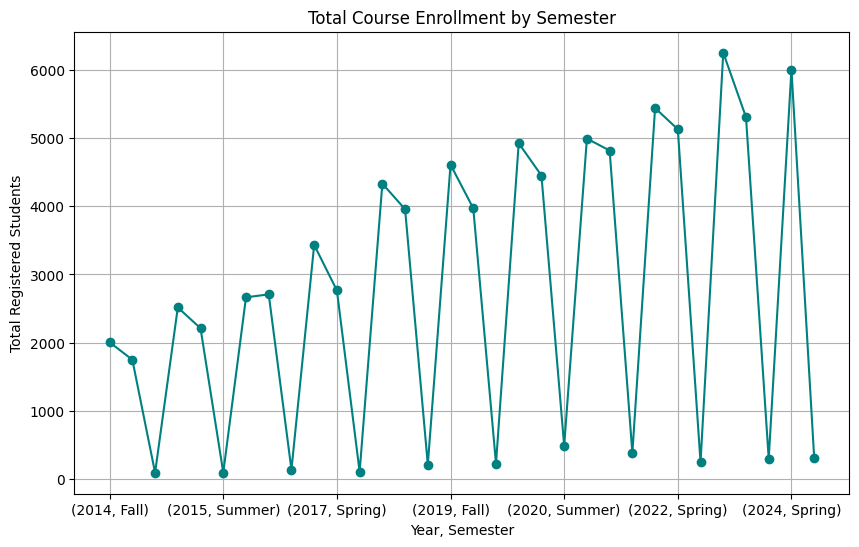

In [4]:
# Load data

# Aggregate the number of registered students by semester
enrollment_trends = data.groupby(['YEAR', 'SEMESTER'])['Total Registered'].sum()

# Plot
enrollment_trends.plot(kind='line', marker='o', color='teal', figsize=(10, 6))
plt.title("Total Course Enrollment by Semester")
plt.xlabel("Year, Semester")
plt.ylabel("Total Registered Students")
plt.grid()
plt.show()


# Withdrawal rate by course level

<ipython-input-5-c790c6fb9849>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=withdrawal_rate_course_level.index, y=withdrawal_rate_course_level.values, palette="magma")


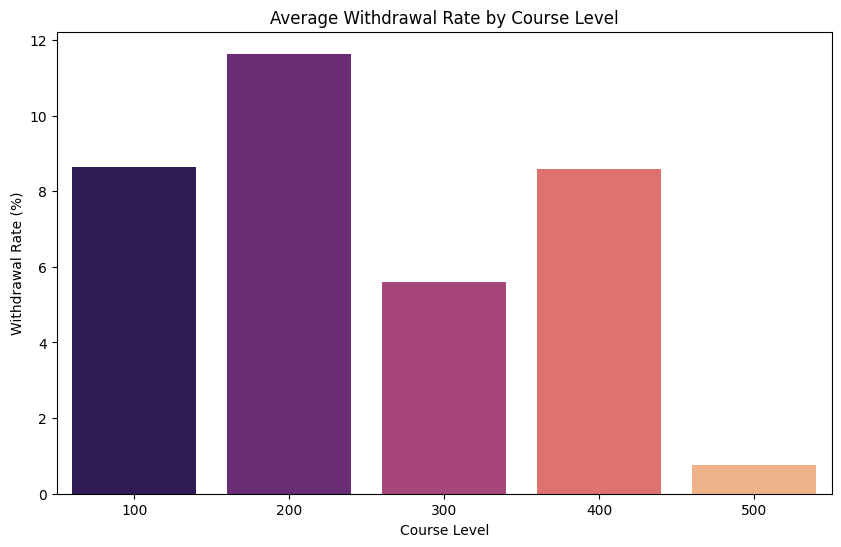

In [5]:
# Calculate withdrawal rate as a percentage of total registered students
data['Withdrawal Rate (%)'] = (data['W'] / data['Total Registered']) * 100

# Aggregate average withdrawal rate by course level
withdrawal_rate_course_level = data.groupby('Course Level')['Withdrawal Rate (%)'].mean().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=withdrawal_rate_course_level.index, y=withdrawal_rate_course_level.values, palette="magma")
plt.title("Average Withdrawal Rate by Course Level")
plt.xlabel("Course Level")
plt.ylabel("Withdrawal Rate (%)")
plt.show()




# Grade distribution between semesters

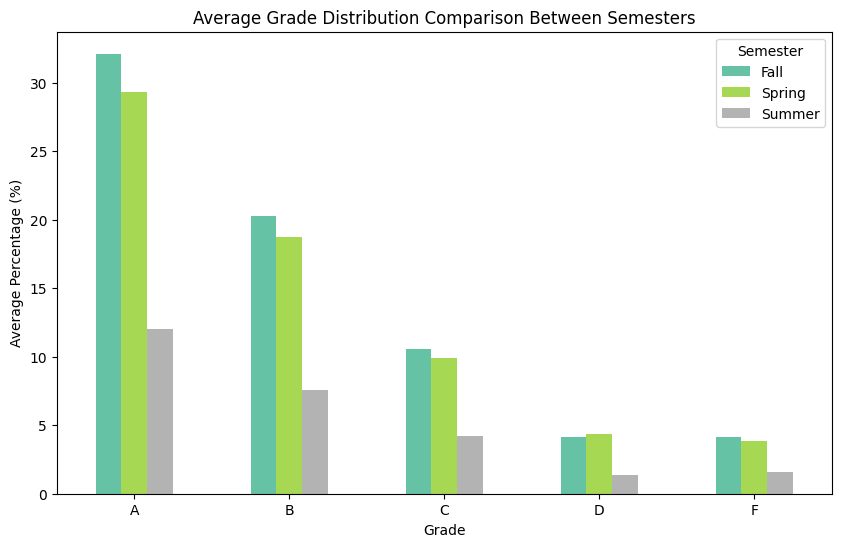

In [6]:
# Calculate average grade distribution for Fall and Spring semesters
semester_grades = data.groupby('SEMESTER')[['A', 'B', 'C', 'D', 'F']].mean()

# Plot side-by-side bar chart
semester_grades.T.plot(kind='bar', figsize=(10, 6), colormap="Set2")
plt.title("Average Grade Distribution Comparison Between Semesters")
plt.xlabel("Grade")
plt.ylabel("Average Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Semester")
plt.show()


# Course distribution by levels

<ipython-input-7-352d23eedef4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=course_level_distribution.index, y=course_level_distribution.values, palette="pastel")


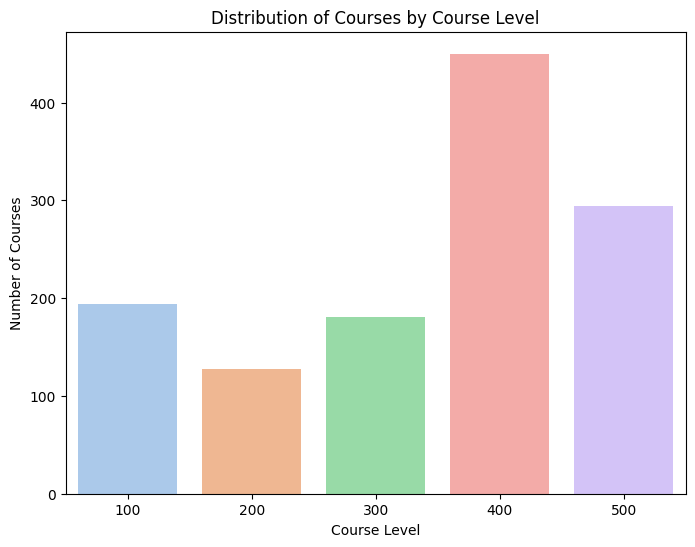

In [7]:
# Count courses by course level
course_level_distribution = data['Course Level'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=course_level_distribution.index, y=course_level_distribution.values, palette="pastel")
plt.title("Distribution of Courses by Course Level")
plt.xlabel("Course Level")
plt.ylabel("Number of Courses")
plt.show()


# Grade distribution for selected Professors


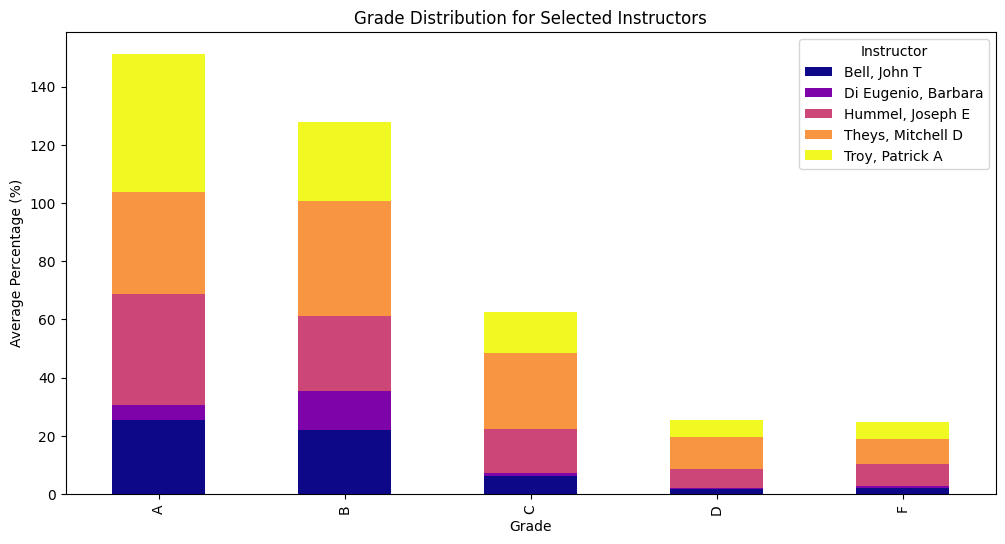

In [8]:
# Select a few instructors for comparison
selected_instructors = data['Primary Instructor'].value_counts().nlargest(5).index
instructor_comparison = data[data['Primary Instructor'].isin(selected_instructors)]
instructor_grades = instructor_comparison.groupby('Primary Instructor')[['A', 'B', 'C', 'D', 'F']].mean()

# Plot
instructor_grades.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="plasma")
plt.title("Grade Distribution for Selected Instructors")
plt.xlabel("Grade")
plt.ylabel("Average Percentage (%)")
plt.legend(title="Instructor")
plt.show()
